In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import chart_studio.plotly as py

import plotly.graph_objs as go

from plotly.offline import plot

#for offline plotting

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


init_notebook_mode(connected=True)

In [5]:
TCS = pd.read_csv('C:\\Users\\Asif Akhtar\\Desktop\\TCS.csv')
TCS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,46.869999,46.869999,43.779999,43.779999,40.924782,798800
1,2014-01-03,44.790001,45.180000,41.779999,42.660000,39.877827,1247300
2,2014-01-06,44.669998,45.000000,42.759998,42.980000,40.176956,1101300
3,2014-01-07,43.840000,45.790001,43.119999,45.790001,42.803696,1677300
4,2014-01-08,41.230000,41.500000,38.689999,39.009998,36.465870,4940300


In [6]:
TCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2438 non-null   object 
 1   Open       2438 non-null   float64
 2   High       2438 non-null   float64
 3   Low        2438 non-null   float64
 4   Close      2438 non-null   float64
 5   Adj Close  2438 non-null   float64
 6   Volume     2438 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 133.5+ KB


In [7]:
TCS['Date'] = pd.to_datetime(TCS [ 'Date' ])

In [11]:
print(f'Dataframe contains stock prices between {TCS.Date.min()} {TCS.Date.max()}')
print (f'Total days = {(TCS.Date.max()- TCS.Date.min()).days} days')

Dataframe contains stock prices between 2014-01-02 00:00:00 2023-09-08 00:00:00
Total days = 3536 days


In [8]:
TCS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03
mean,9.716181,9.953273,9.469483,9.701993,9.247417,4.562013e+05
std,7.566547,7.701447,7.381154,7.531913,7.050207,5.772150e+05
min,1.800000,2.050000,1.800000,1.990000,1.869565,4.690000e+04
25%,4.690000,4.832500,4.572500,4.680000,4.449674,1.966500e+05
50%,6.690000,6.865000,6.530000,6.675000,6.384565,3.060500e+05
75%,11.850000,12.212500,11.530000,11.757500,11.540000,5.040750e+05
max,46.869999,46.869999,43.779999,45.790001,42.803696,9.697500e+06


<Axes: >

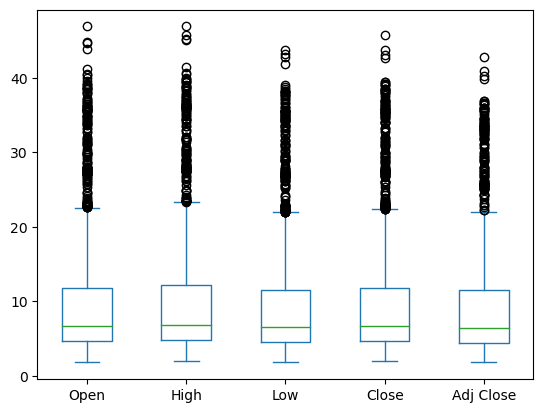

In [9]:
TCS[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [10]:
# Setting the layout for our plot
layout=go. Layout( 
    title='Stock Prices of TCS',
    xaxis=dict( 
        title='Date',
        titlefont=dict( 
            family='Courier New, monospace', 
            size=18, 
            color='#7f7f7f' 
        )

    ), 
    yaxis=dict( 
        title='Price', 
        titlefont=dict(
            family='Courier New, monospace', 
            size=18, 
            color='#7f7f7f'
        )
    )

)

TCS_data = [{'x':TCS['Date'], 'y':TCS['Close']}] 
plot= go. Figure (data=TCS_data,layout=layout)

In [11]:
# plot(plot) #plotting offline
iplot(plot)

In [12]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [13]:
#Split the data into train and test sets
X = np.array(TCS.index).reshape(-1,1)
Y = TCS['Close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [14]:
# Feature scaling 
scaler = StandardScaler().fit(X_train)


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
#Creating a linear model 
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [19]:
# Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x= X_train.T[0],  # Use integers as x-coordinates
    y= Y_train,
    mode= 'markers',
    name= 'Actual'
)
trace1 = go.Scatter(
    x= X_train.T[0],  # Use integers as x-coordinates
    y= lm.predict(X_train).T,
    mode= 'lines',
    name= 'Predicted'
)

TCS_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=TCS_data,layout=layout)

In [20]:
iplot(plot2)

In [21]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.29874837013472044	0.32008450407120237
MSE       39.43022373949212	39.284517265604585

